Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

np.random.seed(42)
tf.random.set_seed(42)

Load the MNIST dataset:

Use keras.datasets.mnist.load_data() to load the training and testing data.
Print the shapes of the loaded data to understand the dataset structure.

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


Preprocess the data for a Fully Connected Neural Network:

Flatten the images from 28x28 to 784 pixels.
Normalize the pixel values by dividing by 255.
One-hot encode the target labels using keras.utils.np_utils.to_categorical().

In [3]:
X_train_fnn = X_train.reshape(60000,784)
X_test_fnn = X_test.reshape(10000,784)

X_train_fnn = tf.cast(X_train_fnn, tf.float32) / 255.0
X_test_fnn = tf.cast(X_test_fnn, tf.float32) / 255.0

y_train_fnn = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_fnn = tf.keras.utils.to_categorical(y_test, num_classes=10)

Build and train a Fully Connected Neural Network:

Create a Sequential model.
Add Dense layers with appropriate activation functions (e.g., ReLU and softmax).
Compile the model with an optimizer (e.g., Adam), loss function (e.g., categorical cross-entropy), and metrics (e.g., accuracy).
Train the model using model.fit() and evaluate its performance.


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[7 2 1 ... 4 5 6]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.1003
Test Accuracy: 0.98
{'accuracy': 0.9756, 'precision': 0.9757256263128607, 'recall': 0.9756, 'f1': 0.9755915004925628}


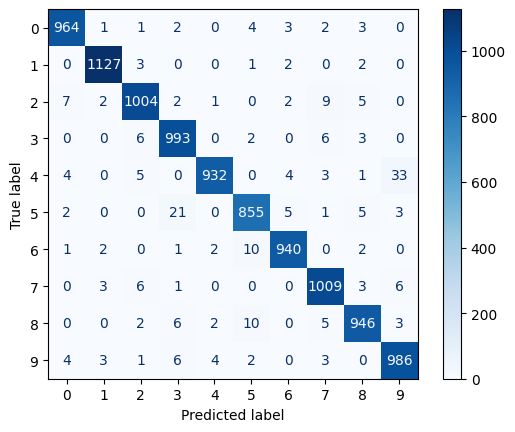

In [4]:
#Define a sequential model using Keras Flatten the 28x28 input images into a single vector
#Add two hidden layers with ReLU activation Add an output layer with Softmax activation for multi-class classification
model = keras.Sequential([
    keras.layers.Dense(units=256, activation='relu'),                    # Hidden layer 1 : A layer with 256 neurons and the ReLU activation function.
    keras.layers.Dense(units=128, activation='relu'),                    # Hidden layer 2 : A layer with 128 neurons for more learning power.
    keras.layers.Dense(units=10, activation='softmax')                   # Output layer :  Outputs 10 probabilities (one for each class).
])
#Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric
model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    x = X_train_fnn,
    y = y_train_fnn,
    batch_size = 32,
    epochs=10,
    steps_per_epoch=500,
    validation_data=(X_test_fnn, y_test_fnn),
    validation_steps=2,
    verbose = False
)


y_pred_fnn = model.predict(X_test_fnn)
y_pred_fnn = np.argmax(y_pred_fnn, axis=1)
print(y_pred_fnn)

test_loss, test_accuracy = model.evaluate(x = X_test_fnn, y = y_test_fnn)
print(f"Test Accuracy: {test_accuracy:.2f}")

y_test_fnn = np.argmax(y_test_fnn, axis=1)
metrics = {
    'accuracy': accuracy_score(y_test_fnn, y_pred_fnn),
    'precision': precision_score(y_test_fnn, y_pred_fnn, average='weighted'),
    'recall': recall_score(y_test_fnn, y_pred_fnn, average='weighted'),
    'f1': f1_score(y_test_fnn, y_pred_fnn, average='weighted')
}

print(metrics)

# Compute confusion matrix
cm = confusion_matrix(y_test_fnn, y_pred_fnn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

Preprocess the data for a Convolutional Neural Network:

Reshape the input data to the shape expected by a Conv2D layer (e.g., (60000, 28, 28, 1)).
Normalize the pixel values by dividing by 255.
One-hot encode the target labels using keras.utils.np_utils.to_categorical().


In [13]:
X_train_cnn = X_train.reshape(60000, 28, 28, 1)
X_test_cnn = X_test.reshape(10000, 28, 28, 1)

X_train_cnn = tf.cast(X_train_cnn, tf.float32) / 255.0
X_test_cnn = tf.cast(X_test_cnn, tf.float32) / 255.0

y_train_cnn = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cnn = tf.keras.utils.to_categorical(y_test, num_classes=10)

Build and train a Convolutional Neural Network:

Create a Sequential model.
Add Conv2D and MaxPool2D layers.
Add a Flatten layer.
Add Dense layers with appropriate activation functions.
Compile and train the model, similar to the Fully Connected Neural Network.

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 28ms/step - accuracy: 0.9131 - loss: 0.2824 - val_accuracy: 0.9799 - val_loss: 0.0602
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 52s 28ms/step - accuracy: 0.9856 - loss: 0.0493 - val_accuracy: 0.9831 - val_loss: 0.0527
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9918 - loss: 0.0268 - val_accuracy: 0.9839 - val_loss: 0.0568
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9941 - loss: 0.0181 - val_accuracy: 0.9825 - val_loss: 0.0660
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9956 - loss: 0.0138 - val_accuracy: 0.9876 - val_loss: 0.0506
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9972 - loss: 0.0091 - val_accuracy: 0.9876 - val_loss: 0.0533
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9966 - loss: 0.0097 - val_accuracy: 0.9874 - val_loss: 0.0566
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9981 - loss: 0.00

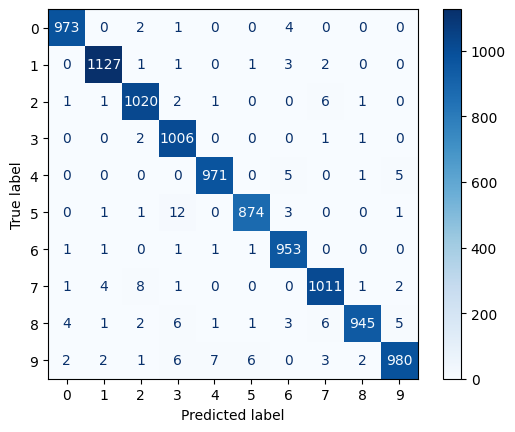

In [17]:
#Define a sequential model using Keras Flatten the 28x28 input images into a single vector
#Add two hidden layers with ReLU activation Add an output layer with Softmax activation for multi-class classification
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation='relu'),                    # Hidden layer 1 : A layer with 256 neurons and the ReLU activation function.
    keras.layers.Dense(units=128, activation='relu'),                    # Hidden layer 2 : A layer with 128 neurons for more learning power.
    keras.layers.Dense(units=10, activation='softmax')                   # Output layer :  Outputs 10 probabilities (one for each class).
])
#Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric
model_cnn.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model_cnn.fit(
    x= X_train_cnn,
    y= y_train_cnn,
    batch_size = 32,
    epochs=10,
    validation_data= (X_test_cnn, y_test_cnn),
    verbose = True
)


y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)
print(y_pred_cnn)

test_loss, test_accuracy = model_cnn.evaluate(x = X_test_cnn, y = y_test_cnn)
print(f"Test Accuracy: {test_accuracy:.2f}")

y_test_cnn = np.argmax(y_test_cnn, axis=1)
metrics = {
    'accuracy': accuracy_score(y_test_cnn, y_pred_cnn),
    'precision': precision_score(y_test_cnn, y_pred_cnn, average='weighted'),
    'recall': recall_score(y_test_cnn, y_pred_cnn, average='weighted'),
    'f1': f1_score(y_test_cnn, y_pred_cnn, average='weighted')
}

print(metrics)

# Compute confusion matrix
cm = confusion_matrix(y_test_cnn, y_pred_cnn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')